In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# read the dataset
df=pd.read_csv("exams.csv")

In [3]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,high school,standard,none,92,91,86
1,female,group E,some college,free/reduced,completed,80,75,83


In [4]:
df.shape

(1000, 8)

# Data checks to perform
# 1.check missing values
# 2.check duplicates 
# 3.check datatype
# 4.check the number of unique values for each column
# 5.check statistics of dataset
# 6.check various categories present in the different categorical column

In [5]:
# check missing values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
# check duplicates
df.duplicated().sum()

1

In [7]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(999, 8)

In [9]:
# check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       999 non-null    object
 1   race/ethnicity               999 non-null    object
 2   parental level of education  999 non-null    object
 3   lunch                        999 non-null    object
 4   test preparation course      999 non-null    object
 5   math score                   999 non-null    int64 
 6   reading score                999 non-null    int64 
 7   writing score                999 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 70.2+ KB


In [10]:
# check unique values of each column
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     77
reading score                  71
writing score                  77
dtype: int64

In [11]:
# check statistical of the dataset 
df.describe()      

,math score,reading score,writing score
count,999.000000,999.000000,999.000000
mean,66.371371,69.354354,68.145145
std,15.254856,14.802797,15.498269
min,11.000000,21.000000,15.000000
25%,57.000000,59.000000,57.000000
50%,66.000000,70.000000,68.000000
75%,77.000000,80.000000,79.000000
max,100.000000,100.000000,100.000000


In [12]:
# Insights from the above discription of numerical data
# 1.the mean for all the features lies in between 66 to 69
# 2.the mean for all the features lies in between 14.8 to 15.49

In [13]:
# separate categorical feature
[features for features in df.columns if df[features].dtype==object]

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [14]:
# separate numerical feature
[features for features in df.columns if df[features].dtype!=object]

['math score', 'reading score', 'writing score']

In [15]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,high school,standard,none,92,91,86
1,female,group E,some college,free/reduced,completed,80,75,83


In [16]:
df["gender"].value_counts()

female    510
male      489
Name: gender, dtype: int64

In [17]:
df["race/ethnicity"].value_counts()

group C    320
group D    261
group B    218
group E    117
group A     83
Name: race/ethnicity, dtype: int64

In [18]:
# aggregate the total score with mean
df["total"]=df["reading score"]+df["writing score"]+df["math score"]
df["average"]=df["total"]/3

In [19]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total,average
0,female,group C,high school,standard,none,92,91,86,269,89.666667
1,female,group E,some college,free/reduced,completed,80,75,83,238,79.333333


In [20]:
# explore more visualization

<AxesSubplot: xlabel='average', ylabel='Count'>

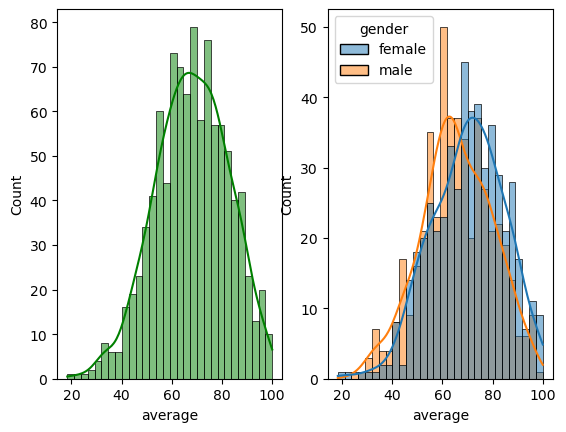

In [23]:
plt.subplots(1,2)
plt.subplot(121)
sns.histplot(data=df, x=df["average"], bins=30, kde=True, color="green")
plt.subplot(122)
sns.histplot(data=df, x=df["average"], bins=30, hue="gender", kde=True, color="green")
# insights
# female students tends to perform well than the male students

In [24]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total,average
0,female,group C,high school,standard,none,92,91,86,269,89.666667
1,female,group E,some college,free/reduced,completed,80,75,83,238,79.333333


<AxesSubplot: xlabel='average', ylabel='Count'>

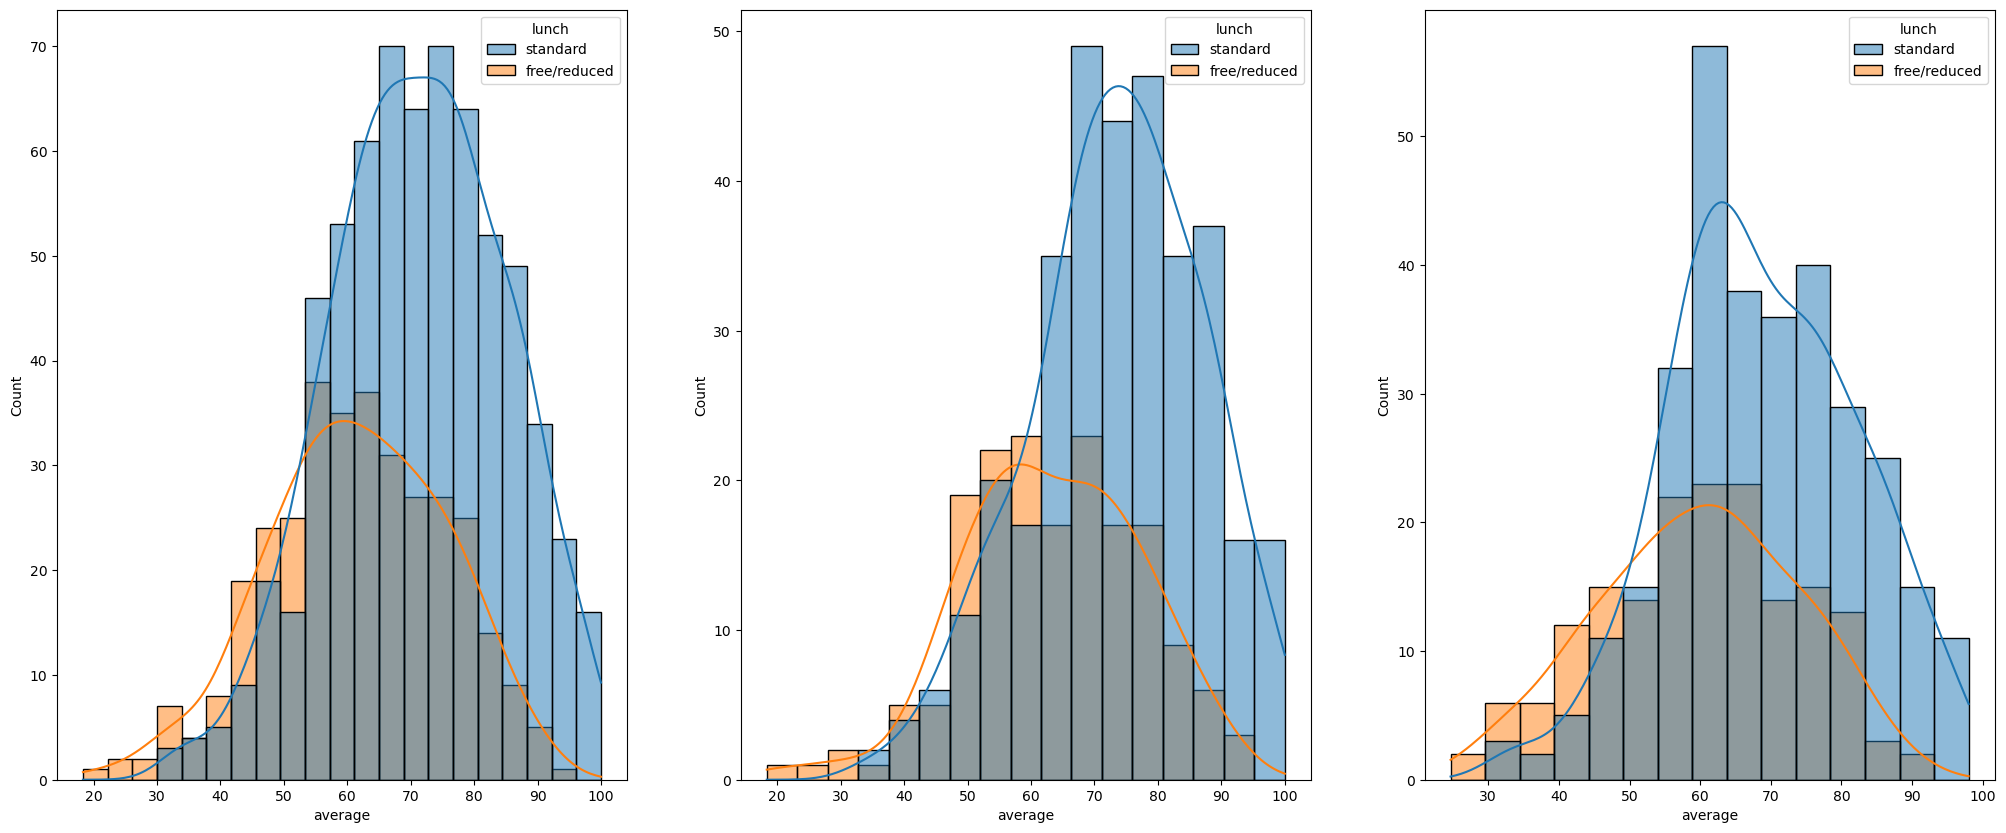

In [46]:
plt.subplots(1,3 ,figsize=(25,10))
plt.subplot(131)
sns.histplot(data=df, x="average", kde=True, hue="lunch")
plt.subplot(132)
sns.histplot(data=df[df["gender"]=="female"], x="average", kde=True, hue="lunch")
plt.subplot(133)
sns.histplot(data=df[df["gender"]=="male"], x="average", kde=True, hue="lunch")
# insights
# standard lunch helps students to perform well exams

<AxesSubplot: xlabel='average', ylabel='Count'>

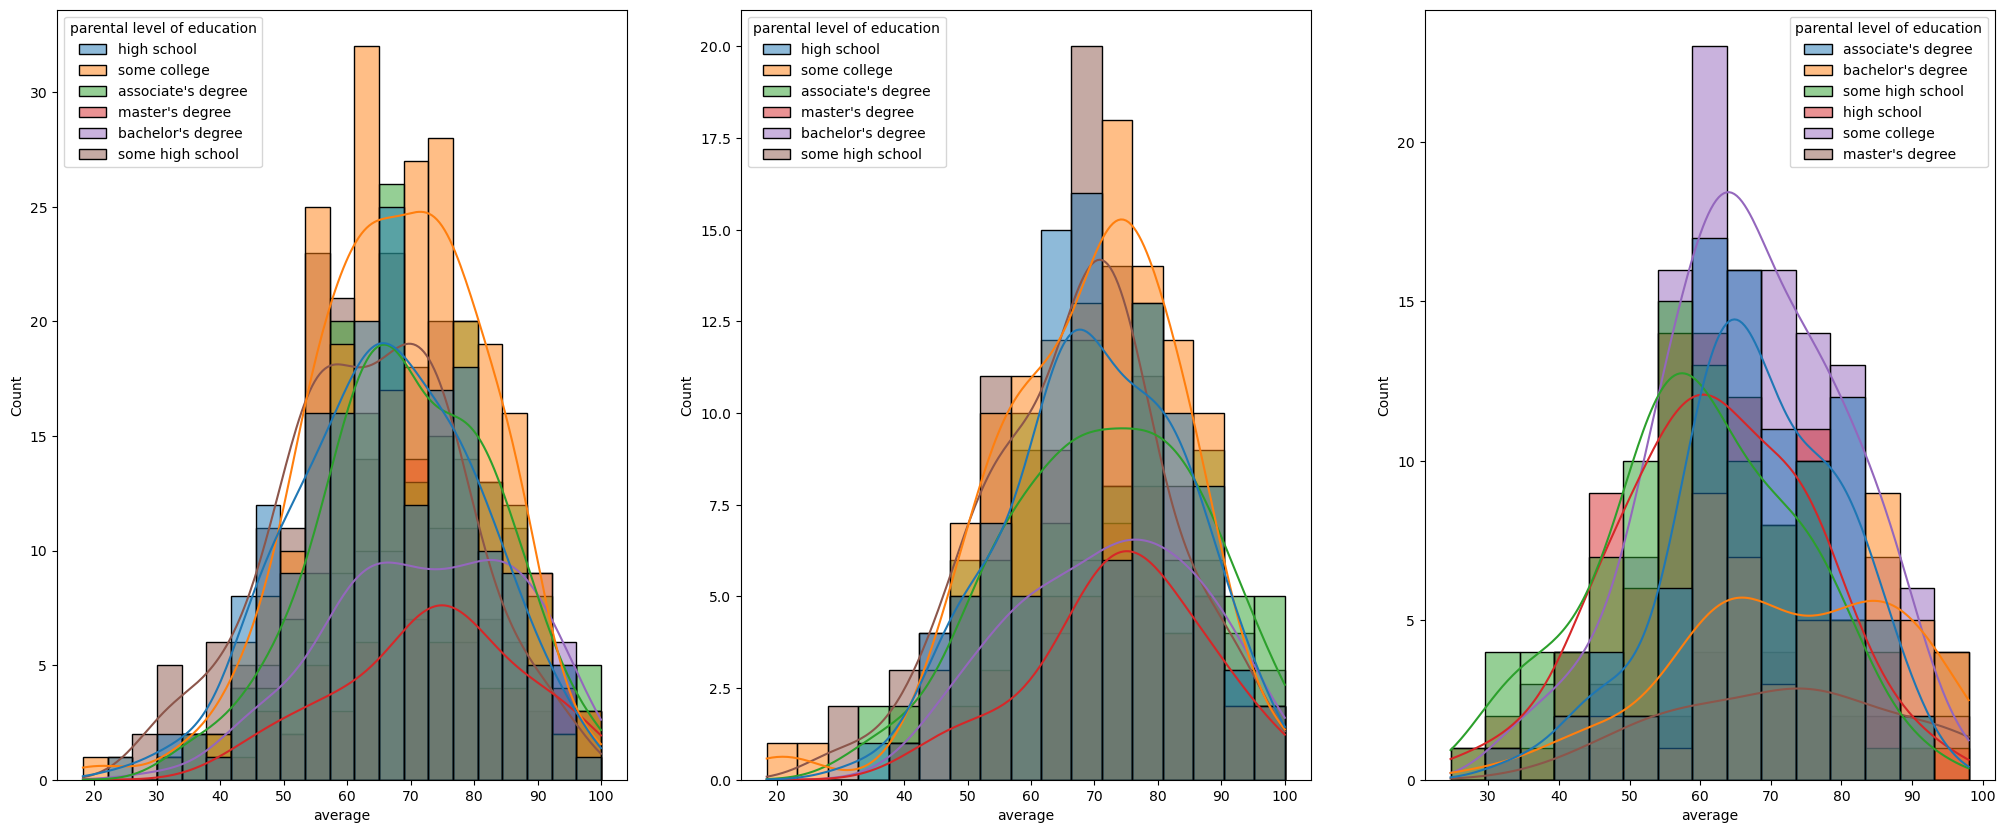

In [45]:
plt.subplots(1,3, figsize=(25,10))
plt.subplot(131)
sns.histplot(data=df, x="average", kde=True, hue="parental level of education")
plt.subplot(132)
sns.histplot(data=df[df["gender"]=="female"], x="average", kde=True, hue="parental level of education")
plt.subplot(133)
sns.histplot(data=df[df["gender"]=="male"], x="average", kde=True, hue="parental level of education")
# insights
# In general, parental level of education doesn't helps students to perform well is exams 
# due to normal distribution

<AxesSubplot: xlabel='average', ylabel='Count'>

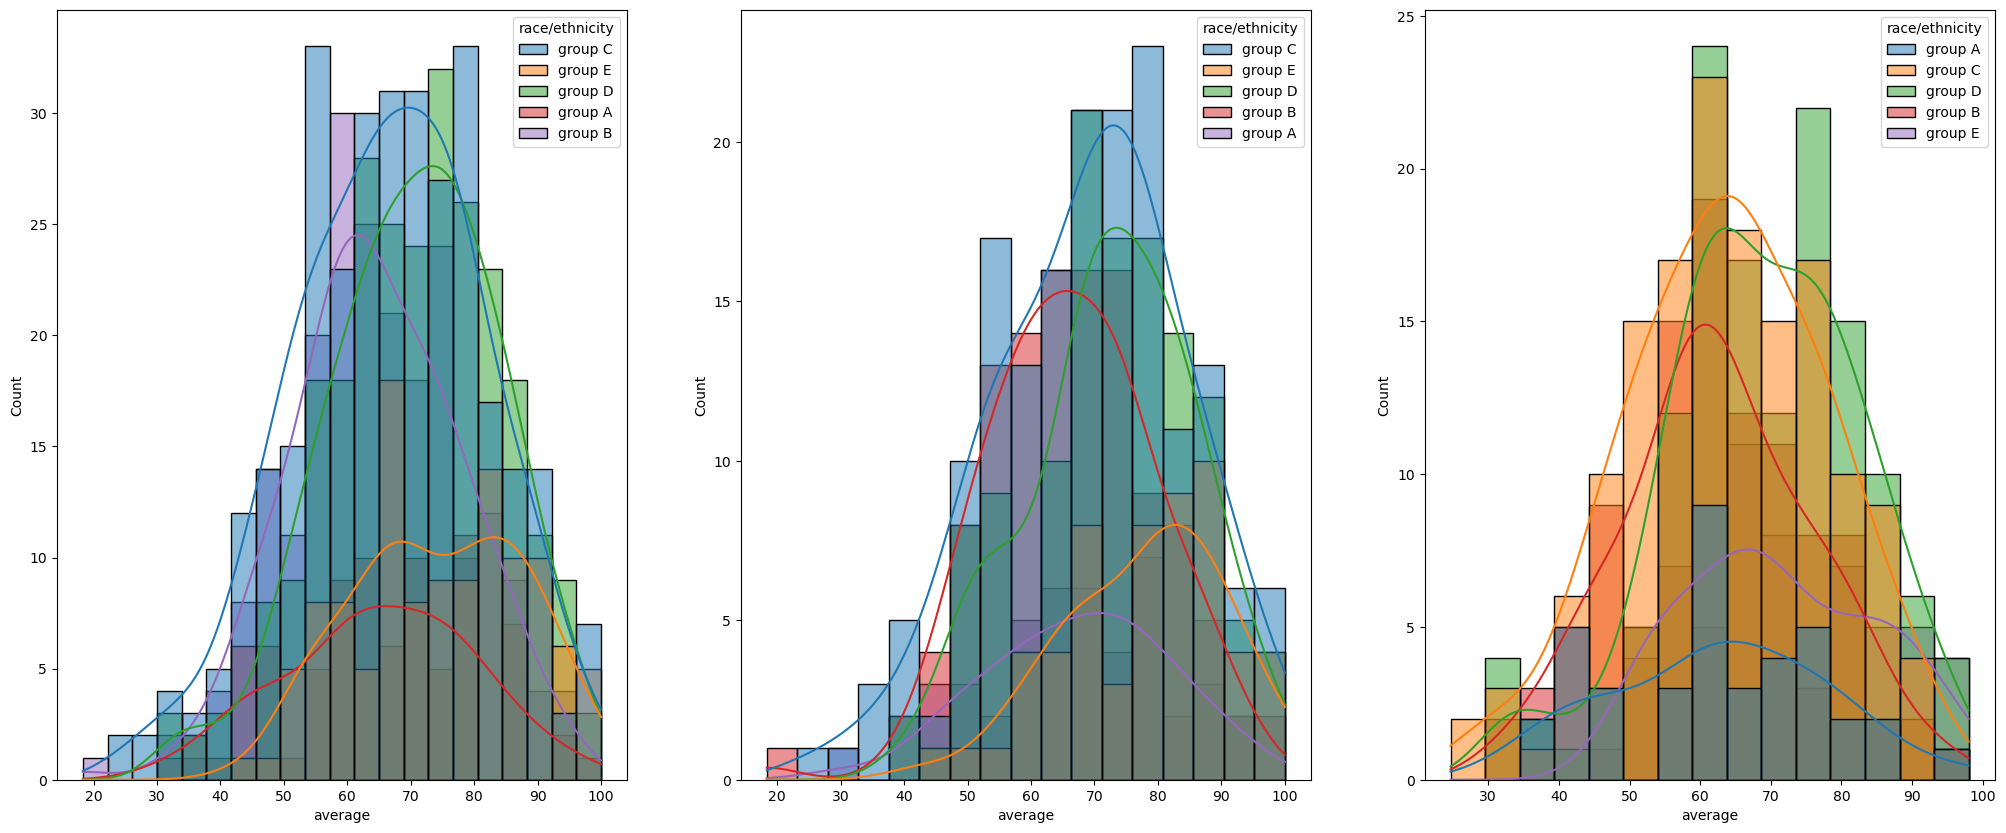

In [48]:
plt.subplots(1,3,figsize=(25,10))
plt.subplot(131)
sns.histplot(data=df, x="average", kde=True, hue="race/ethnicity")
plt.subplot(132)
sns.histplot(data=df[df["gender"]=="female"], x="average", kde=True, hue="race/ethnicity")
plt.subplot(133)
sns.histplot(data=df[df["gender"]=="male"], x="average", kde=True, hue="race/ethnicity")
# insights
# In general, race/ethnicity doesn't helps students to perform well is exams 
# due to normal distribution

<AxesSubplot: >

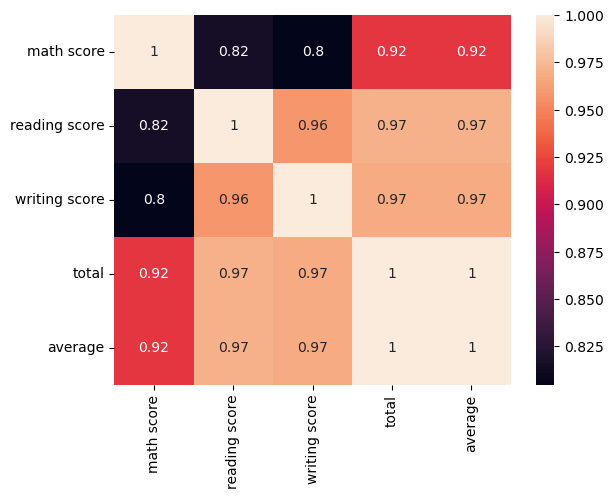

In [56]:
sns.heatmap(df.corr(), annot=True)